In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np

In [12]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [19]:
labels = np.unique(df[4])

lr = LogisticRegression()
df[1:3]

,0,1,2,3,4
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


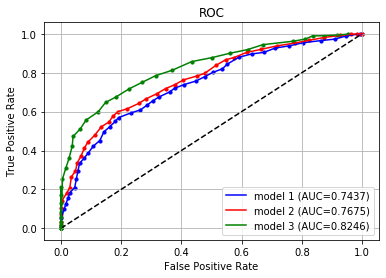

In [143]:
def model2(x_, y_, th_):
    #return np.array([True] * len(x_))
    return 1.8*x_+0.3*y_>th_
def model3(x_, y_, th_):
    return 1.2*x_+0.7*y_-0.2>th_
def model1(x_, y_, th_):
    return 2*x_ + 0.1*y_ > th_
def auc(roc_):
    tmp = roc_.copy()
    tmp = np.insert(tmp, 0, [0, 0], axis=0)
    tmp = np.insert(tmp, len(tmp), [1, 1], axis=0)
    result = 0
    for i in range(1, len(tmp)):
        x1, y1 = tmp[i-1][0], tmp[i-1][1]
        x2, y2 = tmp[i][0], tmp[i][1]
        result += (x2-x1) * (y1+y2)/2
    return result

N = 1000
x = np.random.rand(N)
y = np.random.rand(N)
labels = np.array([x_ + y_ > np.random.rand(1)[0]*1.5 for x_, y_ in zip(x, y)])
num_pos = np.count_nonzero(labels)
num_neg = N - num_pos

models = {0: model1, 1: model2, 2: model3}
roc = {i: [] for i in models}
colors = ['b', 'r', 'g', 'orange']

for i in models:
    model = models[i]
    for th in np.arange(41)*2/40:
        m = model(x, y, th)
        tp = np.count_nonzero(np.logical_and(m==True, m==labels)) / num_pos
        fp = np.count_nonzero(np.logical_and(m==True, m!=labels)) / num_neg
        roc[i].append([fp, tp])
    roc[i] = np.array(roc[i])
    roc[i] = roc[i][np.argsort(roc[i][:,0])]

plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], c='black', linestyle='dashed')
for i in roc:
    plt.scatter(roc[i][:,0], roc[i][:,1], s=10, c=colors[i])
    plt.plot(roc[i][:,0], roc[i][:,1], c=colors[i], label='model {} (AUC={:.4f})'.format(i+1, auc(roc[i])))
plt.grid()
plt.legend()
plt.show()